In [1]:
import numpy as np
import pandas as pd
import re  # used to search words in text or paragraphs
from nltk.corpus import stopwords # to remove meaningless words such as a, the ,are.....
from nltk.stem.porter import PorterStemmer # filters the root word
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import nltk
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
Dataset2_one = pd.read_csv("/content/Constraint_English_Train.xlsx - Sheet1.csv")
Dataset2_two = pd.read_csv("/content/Constraint_English_Val.xlsx - Sheet1.csv")
Dataset2_three = pd.read_csv("/content/english_test_with_labels.csv")

In [5]:
Dataset2_one.nunique()

id       6420
tweet    6420
label       2
dtype: int64

In [6]:
Dataset2_two.nunique()

id       2140
tweet    2140
label       2
dtype: int64

In [7]:
Dataset2_three.nunique()

id       2140
tweet    2140
label       2
dtype: int64

In [8]:
Dataset2_one.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [9]:
# Function to replace labels
def replace_labels(df):
    df['label'] = df['label'].replace({'fake': 0, 'real': 1})
    return df

# Apply the function to each dataset
Dataset2_one = replace_labels(Dataset2_one)
Dataset2_two = replace_labels(Dataset2_two)
Dataset2_three = replace_labels(Dataset2_three)

In [10]:
# Verify the changes
print(Dataset2_one['label'].unique())
print(Dataset2_two['label'].unique())
print(Dataset2_three['label'].unique())

[1 0]
[0 1]
[1 0]


In [11]:
# Concatenate the datasets
Dataset3 = pd.concat([Dataset2_one, Dataset2_two, Dataset2_three], ignore_index=True)
# Reset the index (optional)
Dataset3.reset_index(drop=True, inplace=True)
# Display the merged dataset
print(Dataset3.head())

   id                                              tweet  label
0   1  The CDC currently reports 99031 deaths. In gen...      1
1   2  States reported 1121 deaths a small rise from ...      1
2   3  Politically Correct Woman (Almost) Uses Pandem...      0
3   4  #IndiaFightsCorona: We have 1524 #COVID testin...      1
4   5  Populous states can generate large case counts...      1


In [12]:
# Drop the "id" column in place
Dataset3.drop(columns=['id'], inplace=True)
# Display the updated dataset
print(Dataset3.head())


                                               tweet  label
0  The CDC currently reports 99031 deaths. In gen...      1
1  States reported 1121 deaths a small rise from ...      1
2  Politically Correct Woman (Almost) Uses Pandem...      0
3  #IndiaFightsCorona: We have 1524 #COVID testin...      1
4  Populous states can generate large case counts...      1


In [14]:
# Assuming your DataFrame is named df
Dataset3 = Dataset3.dropna()

In [15]:
Dataset3.isnull().sum()

tweet    0
label    0
dtype: int64

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
#Removal of HTML Contents
def remove_html(tweet):
    soup = BeautifulSoup(tweet, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(tweet):
    return re.sub('\[[^]]*\]', '', tweet)

# Removal of Special Characters
def remove_characters(tweet):
    return re.sub("[^a-zA-Z]"," ",tweet)

#Removal of stopwords
def remove_stopwords_and_lemmatization(tweet):
    final_tweet = []
    tweet = tweet.lower()
    tweet = nltk.word_tokenize(tweet)

    for word in tweet:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_tweet.append(word)
    return " ".join(final_tweet)

#Total function
def cleaning(tweet):
    tweet = remove_html(tweet)
    tweet = remove_punctuations(tweet)
    tweet = remove_characters(tweet)
    tweet = remove_stopwords_and_lemmatization(tweet)
    return tweet

#Apply function on tweet column
Dataset3['tweet']=Dataset3['tweet'].apply(cleaning)

<ipython-input-18-9ee47bd4cabc>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(tweet, "html.parser")


In [19]:
# Function to remove URLs
def remove_urls(tweet):
    url_pattern = re.compile(r'http\S+')
    return url_pattern.sub(r'', tweet)

# Apply the function to the 'tweet' column
Dataset3['tweet'] = Dataset3['tweet'].apply(remove_urls)

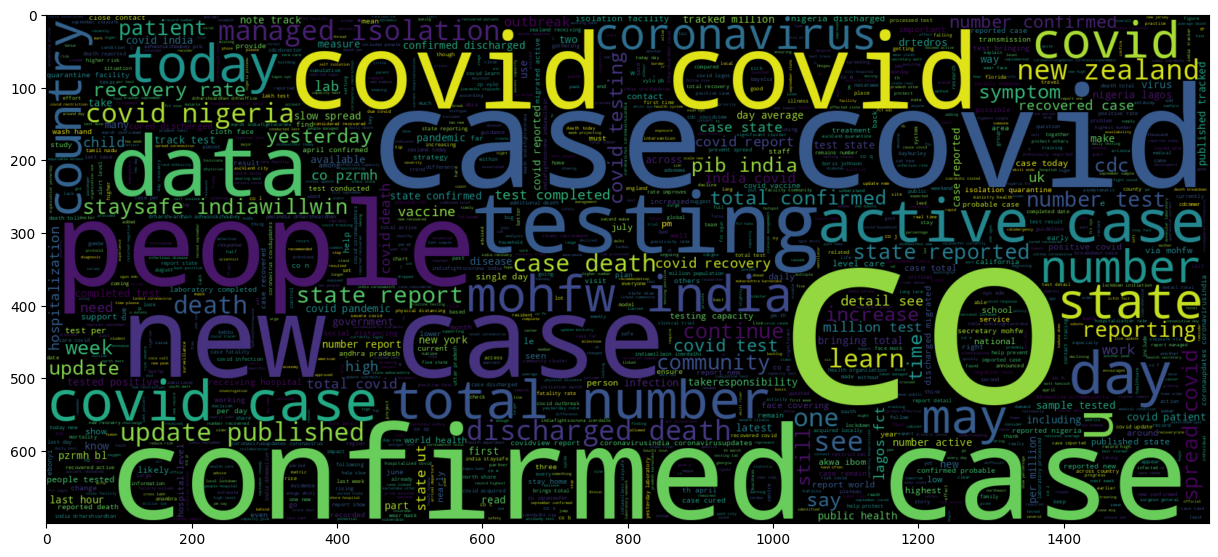

In [20]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 1].tweet))
plt.imshow(wc, interpolation="bilinear")

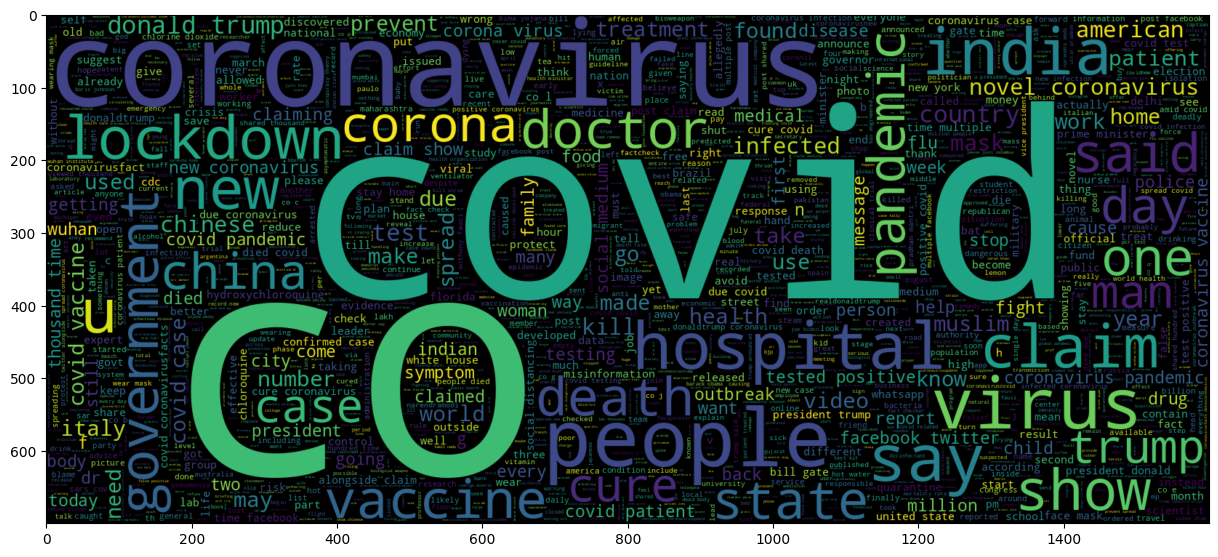

In [21]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 0].tweet))
plt.imshow(wc, interpolation="bilinear")

In [22]:
!pip install wordcloud matplotlib numpy pillow

In [25]:
# Load mask image
mask = np.array(Image.open('/content/corona 1 img.jpg'))
mask2 = np.array(Image.open('/content/corona 2 imggg.jpg'))

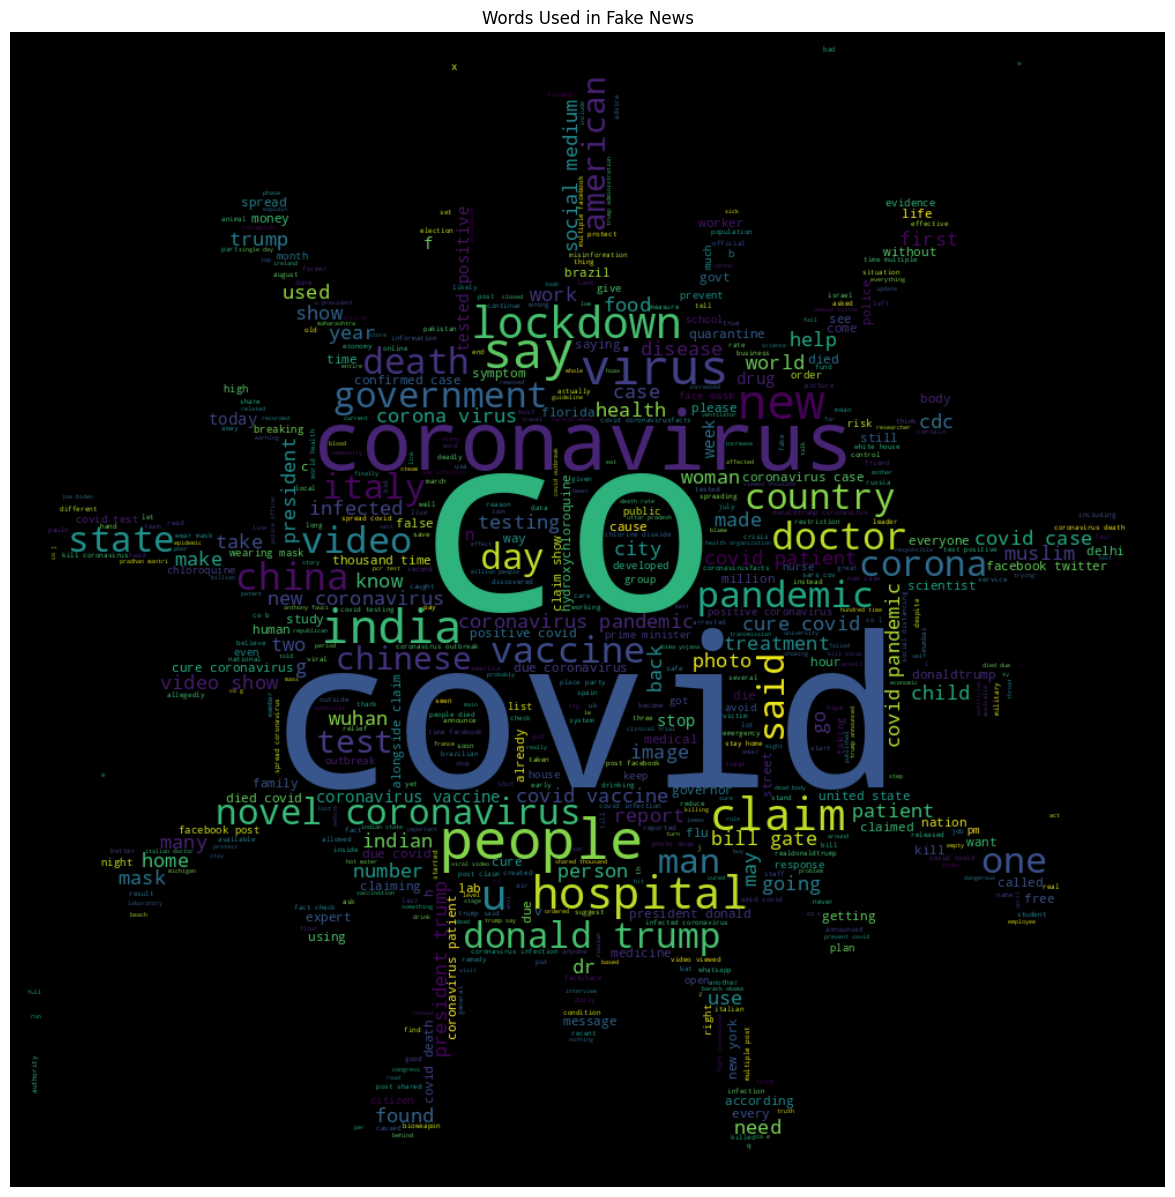

In [24]:
# Generate word cloud
wc = WordCloud(
    max_words=2000,
    width=1600,
    height=700,
    stopwords=STOPWORDS,
    mask=mask,
    contour_width=1,
    contour_color='black'
).generate(" ".join(Dataset3[Dataset3.label == 0].tweet))

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')  # Remove axes
plt.title('Words Used in Fake News')
plt.show()

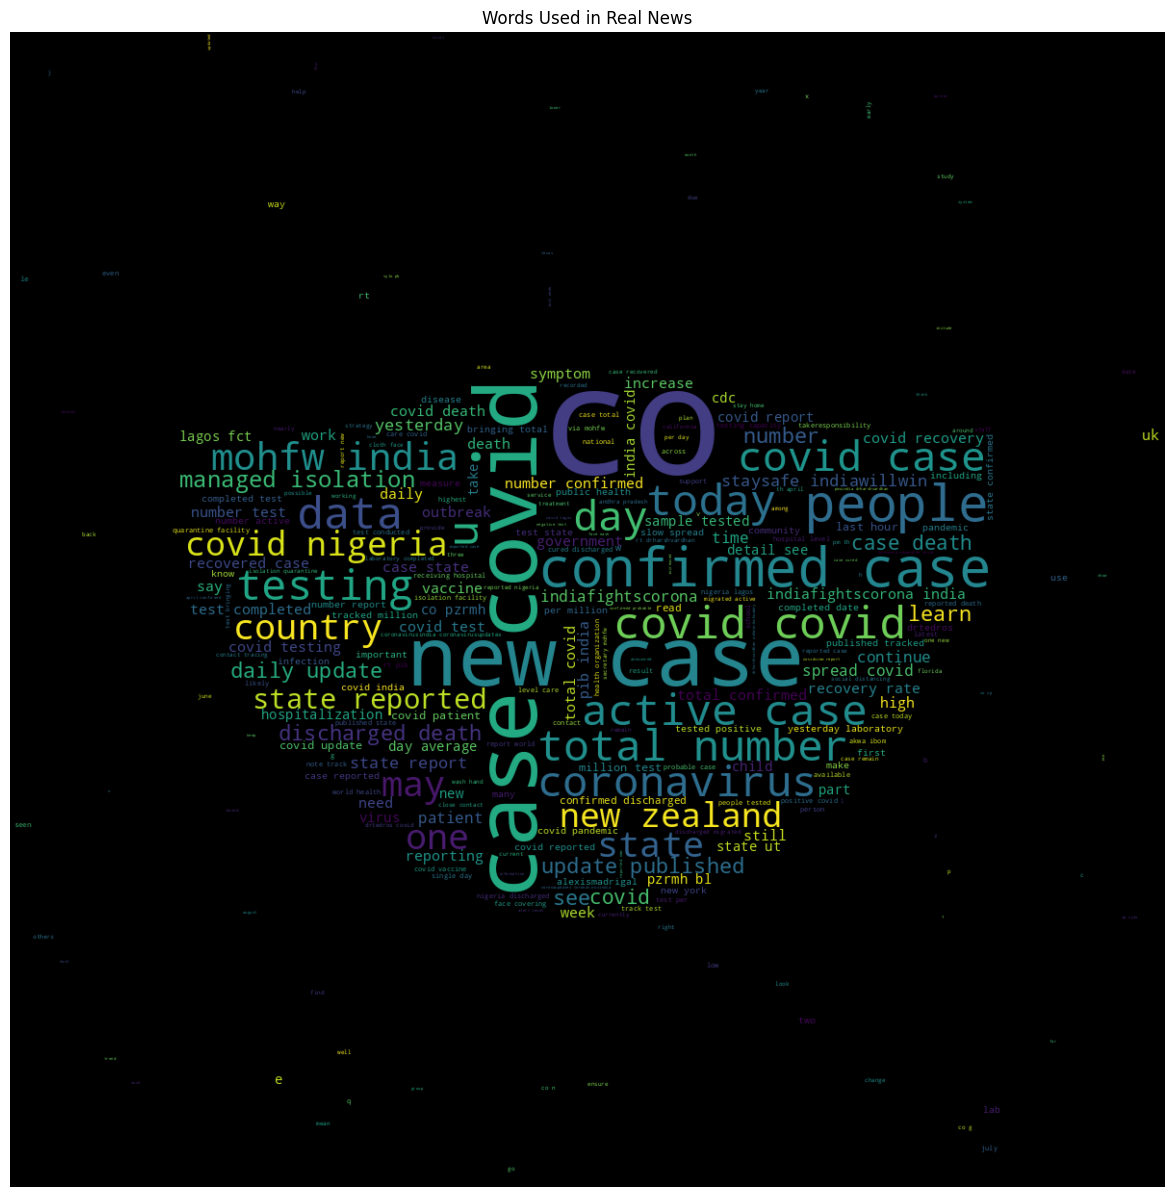

In [31]:
# Generate word cloud
wc = WordCloud(
    max_words=2000,
    width=1600,
    height=700,
    stopwords=STOPWORDS,
    mask=mask2,
    contour_width=1,
    contour_color='black'
).generate(" ".join(Dataset3[Dataset3.label == 1].tweet))

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')  # Remove axes
plt.title('Words Used in Real News')
plt.show()

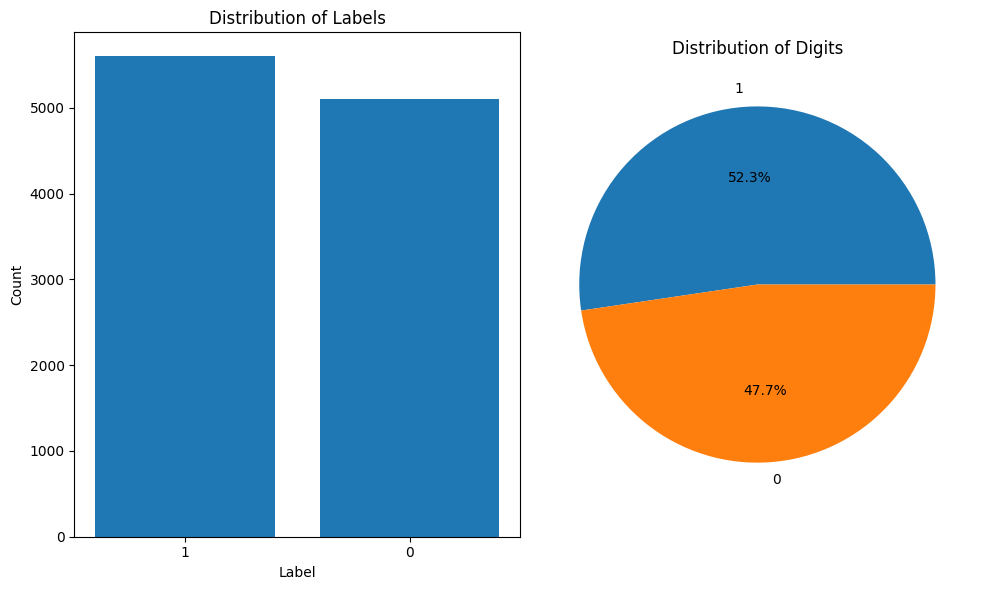

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label in the 'label' column
label_counts = Dataset3['label'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axes[0].bar(label_counts.index.astype(str), label_counts.values)
axes[0].set_title('Distribution of Labels')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

axes[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of Digits')

plt.tight_layout()
plt.show()

In [33]:
Dataset3

,tweet,label
0,cdc currently report death general discrepancy...,1
1,state reported death small rise last tuesday s...,1
2,politically correct woman almost us pandemic e...,0
3,indiafightscorona covid testing laboratory ind...,1
4,populous state generate large case count look ...,1
...,...,...
10695,coronavirusupdates state wise detail total con...,1
10696,tonight midnight onwards disaster management a...,0
10697,new case covid nigeria plateau enugu oyo lagos...,1
10698,rt cdcemergency dyk cdcgov one stop shop covid...,1


In [34]:
Dataset3.to_csv(r"CoronaData_preprocessing.csv",index=False)